# Sistema de Recomendação de Livros

# Problema de *Negócio* :

  Usaremos o método de filtragem baseada em coloboração
  para construir um sistema de recomendação de livros.
construir por máquina preditiva.




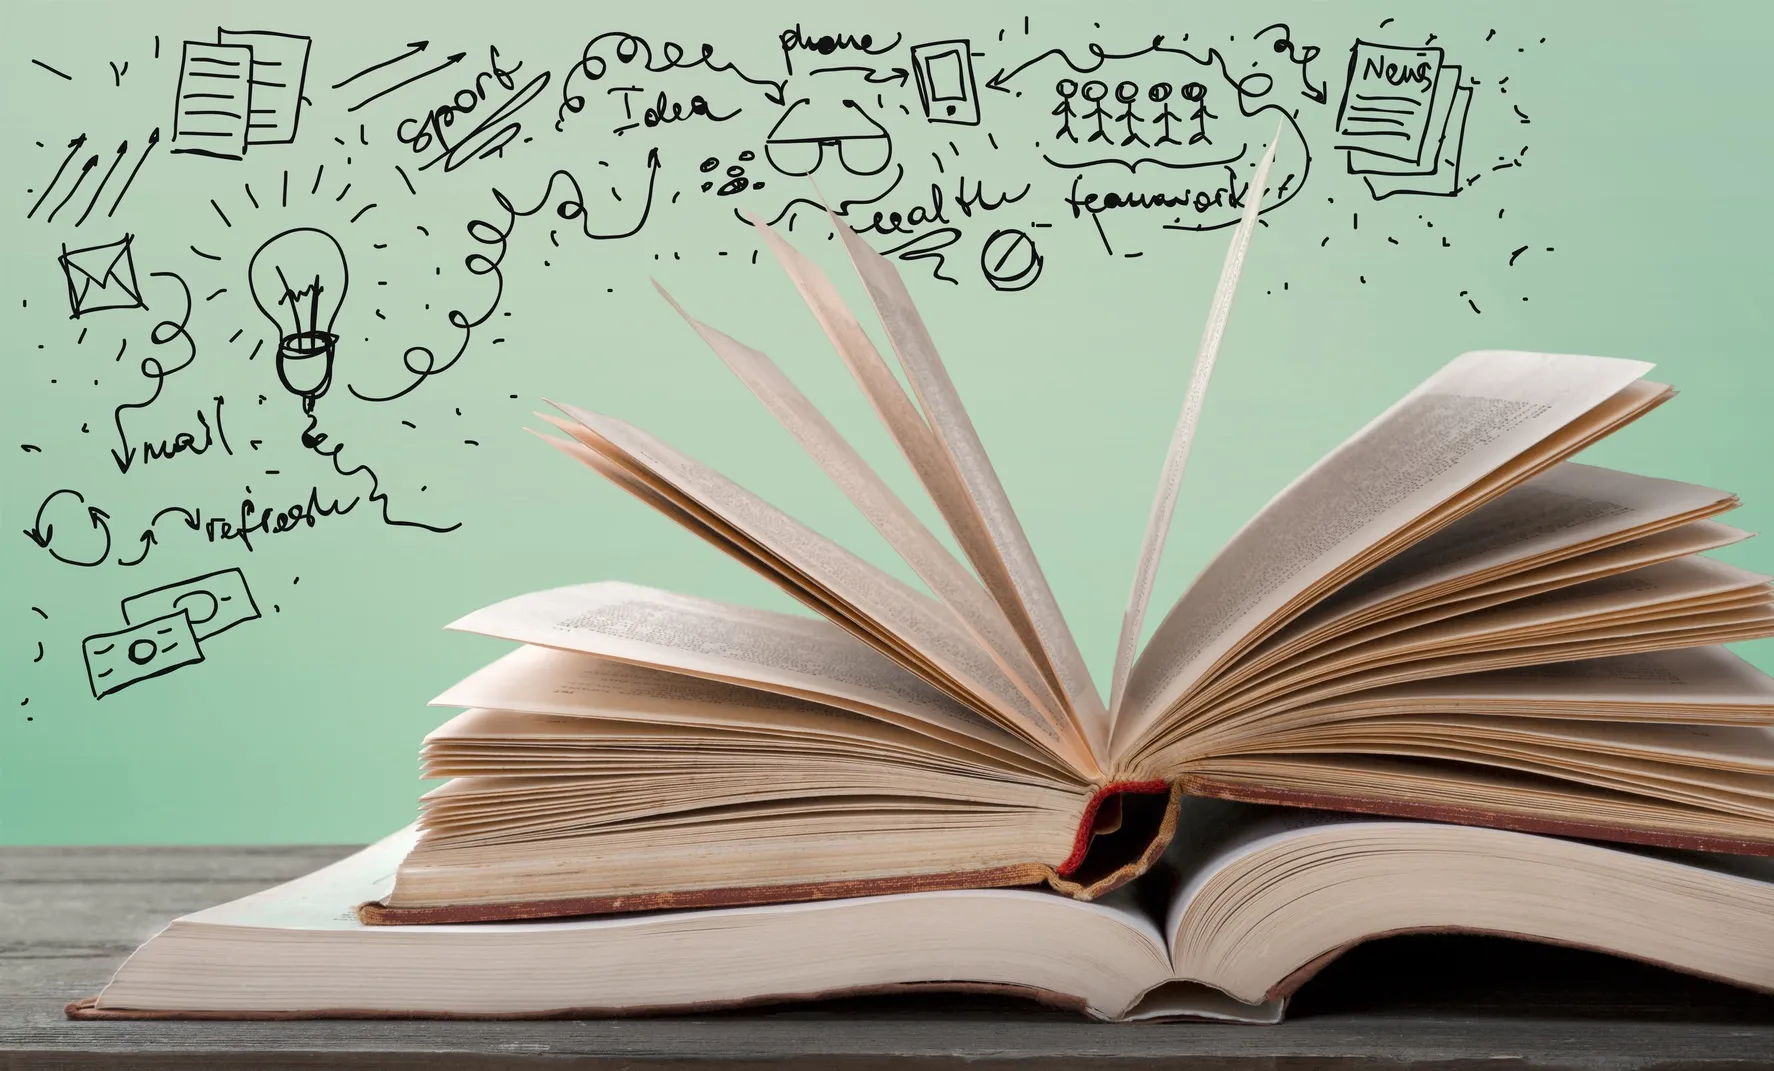

# Resultado
você concorda que se voce receber recomendação de livros , a probabilidade de cv compra e maio.

**Análise Esploratória**

In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Base de Livros

In [ ]:
# importação dos dados sobre os livros
books = pd.read_csv('Books.csv')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
3962,043944246X,September 12th: We Knew We Would Be All Right,First Grade Students of H. Byron Masterson Ele...,2002,Scholastic,http://images.amazon.com/images/P/043944246X.0...,http://images.amazon.com/images/P/043944246X.0...,http://images.amazon.com/images/P/043944246X.0...
3963,0060954884,Anna and the King of Siam,Margaret Landon,1999,Perennial,http://images.amazon.com/images/P/0060954884.0...,http://images.amazon.com/images/P/0060954884.0...,http://images.amazon.com/images/P/0060954884.0...
3964,0743422961,The Miss America Family : A Novel,Julianna Baggott,2002,Atria,http://images.amazon.com/images/P/0743422961.0...,http://images.amazon.com/images/P/0743422961.0...,http://images.amazon.com/images/P/0743422961.0...
3965,0525946780,"The Museum of Hoaxes: A Collection of Pranks, ...",Alex Boese,2002,Dutton Books,http://images.amazon.com/images/P/0525946780.0...,http://images.amazon.com/images/P/0525946780.0...,http://images.amazon.com/images/P/0525946780.0...


# **Base de Usúarios**

In [ ]:
Usúario = pd.read_csv('Users.csv')
Usúario

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


# **Avaliaçôes dos Usúarios**

In [ ]:
# importando as base de dados
Avaliacao = pd.read_csv('Ratings.csv')
Avaliacao

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


# **Pré-Processamento dos Dados**

In [ ]:
# Renomiar as colunas , agora no arquivo de livros  temos algumas colunas extras.
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication','Publisher']]
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
Usúario.rename(columns={'User-ID':'user-id','Location':'location','Age':'age'},inplace=True)
Avaliacao.rename(columns={'User-ID':'user-id','Book-Rating':'rating'},inplace=True)


<ipython-input-34-5ba139d5896c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)


In [ ]:
books


,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
3962,043944246X,September 12th: We Knew We Would Be All Right,First Grade Students of H. Byron Masterson Ele...,2002,Scholastic
3963,0060954884,Anna and the King of Siam,Margaret Landon,1999,Perennial
3964,0743422961,The Miss America Family : A Novel,Julianna Baggott,2002,Atria
3965,0525946780,"The Museum of Hoaxes: A Collection of Pranks, ...",Alex Boese,2002,Dutton Books


In [ ]:
Avaliacao

,user-id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# quantidade ranting por usuario
Avaliacao['user-id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user-id, Length: 105283, dtype: int64

In [ ]:
# livros que tenhan mais de 200 avaliação
x = Avaliacao['user-id'].value_counts() > 200

In [ ]:
x

11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
59727     True
188951    True
268622    True
9856      True
155916    True
Name: user-id, Length: 899, dtype: bool

In [ ]:
# quantidade Usúarios
#user_ids
y = x[x].index
print(y.shape)

(899,)


In [ ]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             88793, 274808,  44296,  28634,  73681,  59727, 188951, 268622,
              9856, 155916],
           dtype='int64', length=899)

# **Decisão**

In [ ]:
  # trazendo ratings somente dos usuários q avaliaram mais de 200 livros
  Avaliacao = Avaliacao[Avaliacao['user-id'].isin(y)]

In [ ]:
  # juntando a tabelas (join ou merge)
  avaliandobks = Avaliacao.merge(books, on='ISBN')
  avaliandobks

,user-id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
52450,269728,0575073004,9,Nightchild (Gollancz SF S.),James Barclay,2002,Gollancz
52451,269728,0575073314,10,Shadowheart : Legends of the Raven (Legends of...,James Barclay,2003,Gollancz
52452,273979,0590477323,0,Building Blocks (Point),Cynthia Voigt,1994,Scholastic
52453,274061,1853262404,0,Heart of Darkness (Wordsworth Collection),Joseph Conrad,1998,NTC/Contemporary Publishing Company


In [ ]:
# quantidade de avaliação dos livros
analisandoboks = avaliandobks.groupby('title')['rating'].count().reset_index()
analisandoboks

,title,rating
0,01-01-00: A Novel of the Millennium,3
1,"100 Great Fantasy Short, Short Stories",4
2,101 Dalmatians,9
3,101 Telephone Jokes,2
4,11th Hour,1
...,...,...
2822,Zeit im Wind.,1
2823,Zen in the Art of Archery (Vintage Spiritual C...,2
2824,Zoot Suit and Other Plays,1
2825,"\O\"" Is for Outlaw""",72


In [ ]:
analisandoboks.rename(columns={'rating':'number-of-rating'},inplace=True)
analisandoboks

,title,number-of-rating
0,01-01-00: A Novel of the Millennium,3
1,"100 Great Fantasy Short, Short Stories",4
2,101 Dalmatians,9
3,101 Telephone Jokes,2
4,11th Hour,1
...,...,...
2822,Zeit im Wind.,1
2823,Zen in the Art of Archery (Vintage Spiritual C...,2
2824,Zoot Suit and Other Plays,1
2825,"\O\"" Is for Outlaw""",72


In [ ]:
# Juntando a tabela de livros com as avaliações com a quantidade de avaliação por livros
final_avaliação = avaliandobks.merge(analisandoboks, on='title')
final_avaliação

,user-id,ISBN,rating,title,author,year,publisher,number-of-rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
...,...,...,...,...,...,...,...,...
52450,269728,0575073004,9,Nightchild (Gollancz SF S.),James Barclay,2002,Gollancz,1
52451,269728,0575073314,10,Shadowheart : Legends of the Raven (Legends of...,James Barclay,2003,Gollancz,1
52452,273979,0590477323,0,Building Blocks (Point),Cynthia Voigt,1994,Scholastic,1
52453,274061,1853262404,0,Heart of Darkness (Wordsworth Collection),Joseph Conrad,1998,NTC/Contemporary Publishing Company,1


In [ ]:
# decisão de negócio
final_avaliação = final_avaliação[final_avaliação['number-of-rating']>=50]
final_avaliação.shape

(26498, 8)

In [ ]:
# vamos descarta os valores duplicados de user_id e title
final_avaliação.drop_duplicates(['user-id','title'],inplace= True)
final_avaliação

<ipython-input-55-df2419b17b1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_avaliação.drop_duplicates(['user-id','title'],inplace= True)


,user-id,ISBN,rating,title,author,year,publisher,number-of-rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,80
...,...,...,...,...,...,...,...,...
45923,263460,0671867156,0,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,78
45924,269566,0671867156,0,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,78
45925,271284,0671867156,0,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,78
45926,273979,0671867156,0,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,78


In [ ]:
# transposição de linhas (user_id) em colunas
book_pivot = final_avaliação.pivot_table(columns='user-id', index='title', values='rating')

In [ ]:
book_pivot

user-id,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"A Child Called \It\"": One Child's Courage to Survive""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wild Animus,NaN,NaN,6.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
Wish You Well,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Without Remorse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.shape

(287, 877)

In [ ]:
book_pivot.fillna(0,inplace=True)

In [ ]:
book_pivot

user-id,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wild Animus,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wish You Well,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Without Remorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Nearest neighbors**
algoritimo de aproximação

In [ ]:
from scipy.sparse import csr_matrix
books_spacy = csr_matrix(book_pivot)

# **Criação de Máquina Preditiva**

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(books_spacy)

NearestNeighbors(algorithm='brute')

# Novas Predições

In [ ]:
distances, suggestions = model.kneighbors(book_pivot.iloc[0,:].values.reshape(1,-1))

In [ ]:
book_pivot.head(5)

user-id,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Livros Endicados
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['1984', 'A Civil Action', 'The Robber Bride', 'CAT'S EYE',
       'Table For Two'],
      dtype='object', name='title')
